In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls
%cd 'drive/My Drive/trainingandtestdata'
!ls 

drive  sample_data
/content/drive/My Drive/trainingandtestdata
 clean_tweet.csv   training.csv		      visualization.ipynb
 testdata.csv	  'twitter sentiment.ipynb'


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import os 
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

%matplotlib inline
pd.set_option('display.max_colwidth', 100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
csv = 'clean_tweet.csv'
cleaned = pd.read_csv(csv,index_col=0)
cleaned.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,upset update facebook texting might cry result school today also blah,0
1,dived many times ball managed save rest go bounds,0
2,whole body feels itchy like fire,0
3,behaving mad see,0
4,whole crew,0


In [5]:
cleaned.dropna(inplace=True)
cleaned.reset_index(drop=True,inplace=True)
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591427 entries, 0 to 1591426
Data columns (total 2 columns):
text      1591427 non-null object
target    1591427 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.3+ MB


In [0]:
cleaned['target'] = cleaned['target'].map({0: 0, 4: 1})

In [0]:
neg_tweets = cleaned[cleaned.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

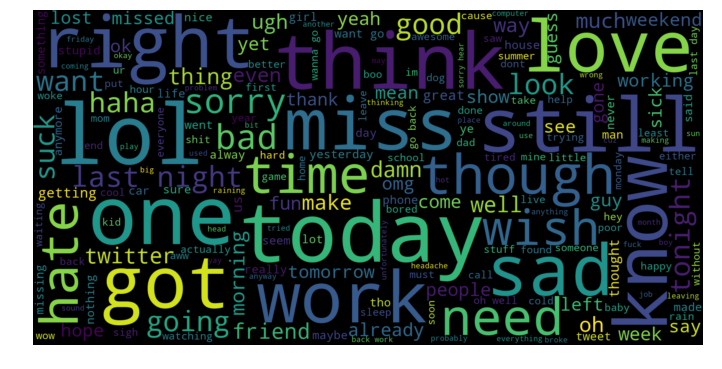

In [10]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
pos_tweets = cleaned[cleaned.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
    
pos_string = pd.Series(pos_string).str.cat(sep=' ')

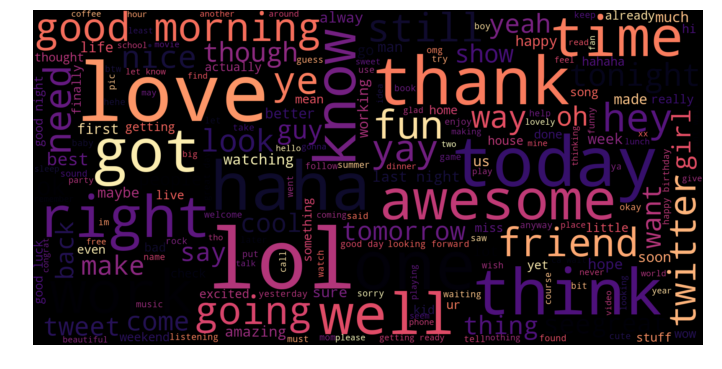

In [44]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()




**Implementing the count vectorizor to calculate the term frequency of data**


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(cleaned.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
len(cvec.get_feature_names())
cleaned[cleaned['target'] == 1]

In [0]:
neg_doc_matrix = cvec.transform(cleaned[cleaned.target == 0].text)
pos_doc_matrix = cvec.transform(cleaned[cleaned.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [49]:
print(neg_doc_matrix.shape)
pos_doc_matrix.shape

(795905, 265758)


(795522, 265758)

In [0]:
term_freq_df.to_csv('term_freq_df.csv',encoding='utf-8')